# Project Title: AI-Based Optimization of Matrix Multiplication Performance Using Reinforcement Learning

### Project Objective:
The goal of this project is to optimize matrix multiplication using Reinforcement Learning (RL), where an agent learns to partition matrices and compute products in an optimized way based on hardware and computational constraints. This will be compared to traditional matrix multiplication methods, including the naive and Strassen’s algorithms.

## STEP I : Generate the matrix data for data collection
- Define matrix types (dense, sparse, etc.).
- Collect performance metrics like execution time and memory usage.

### 1. Import Libraries

In [ ]:
%pip install -r requirements.txt

In [1]:
# Cell 1: Import libraries
import os
import numpy as np
import pandas as pd
import time
import memory_profiler  
import matplotlib.pyplot as plt

# Ensure matplotlib plots inline in the notebook
%matplotlib inline

### 2. Matrix Generation Functions

In [2]:
# Cell 2: Matrix generation functions
# Function to generate dense matrix
def generate_dense_matrix(size):
    return np.random.rand(size, size)

# Function to generate sparse matrix (10% non-zero entries)
def generate_sparse_matrix(size):
    sparse_matrix = np.random.rand(size, size)
    sparse_matrix[sparse_matrix < 0.9] = 0  # 90% zeros
    return sparse_matrix


### 3. Matrix Multiplication

In [3]:
# Cell 3: Matrix multiplication and benchmarking functions
# Naive matrix multiplication (O(n³))
def naive_multiplication(A, B):
    return np.dot(A, B)

# Measure execution time and memory usage
def benchmark_matrix_multiplication(A, B, algorithm):
    # Measure time
    start_time = time.time()
    
    # Track memory usage using memory_profiler
    mem_usage_before = memory_profiler.memory_usage()[0]
    
    result = algorithm(A, B)
    
    end_time = time.time()
    mem_usage_after = memory_profiler.memory_usage()[0]
    
    exec_time = end_time - start_time
    mem_usage = mem_usage_after - mem_usage_before  # Memory difference in MB
    
    return exec_time, mem_usage, result


### 4. Main Benchmarking Logic

The benchmarking logic generates 10 dense and sparse matrices for each matrix size, then tests all combinations of matrix types (Dense x Dense, Sparse x Sparse, Dense x Sparse, Sparse x Dense) using the naive multiplication algorithm. It records the execution time and memory usage for each multiplication. 

The raw results are stored separately, and the average time and memory usage are calculated by averaging the results of the 10 runs for each combination. This process helps analyze the performance of the algorithm across different matrix configurations.

In [7]:
def run_benchmarks():
    # Define matrix sizes
    matrix_sizes = [100, 500, 1000, 5000]  # Sizes: 100x100, 1000x1000, etc.
    num_matrices = 10  # Number of matrices per size
    avg_results = []  # List to store average results
    results = []  # List to store raw results before averaging

    for size in matrix_sizes:
        # Generate 10 dense and sparse matrices
        dense_matrices = [generate_dense_matrix(size) for _ in range(num_matrices)]
        sparse_matrices = [generate_sparse_matrix(size) for _ in range(num_matrices)]

        # Benchmark each combination and take the average of 10 runs for each combination
        combinations = [
            ("Sparse x Sparse", sparse_matrices, sparse_matrices),
            ("Dense x Dense", dense_matrices, dense_matrices),
            ("Dense x Sparse", dense_matrices, sparse_matrices),
            ("Sparse x Dense", sparse_matrices, dense_matrices)
        ]

        for combination, mat_a_list, mat_b_list in combinations:
            total_time = 0
            total_memory = 0
            
             # Perform 10 multiplications and collect results
            for mat_a, mat_b in zip(mat_a_list, mat_b_list):
                exec_time, mem_usage, result = benchmark_matrix_multiplication(mat_a, mat_b, naive_multiplication)
                
                # Append the raw result to results list
                results.append({
                    'Size': size,
                    'Type': combination,
                    'Algorithm': 'Naive',
                    'Time (s)': exec_time,
                    'Memory (MB)': mem_usage
                })
                
                total_time += exec_time
                total_memory += mem_usage
            
            # Calculate average time and memory
            avg_time = total_time / num_matrices
            avg_memory = total_memory / num_matrices
            
            # Append the average result to the avg_results list
            avg_results.append({
                'Size': size,
                'Type': combination,
                'Algorithm': 'Naive',
                'Average Time (s)': avg_time,
                'Average Memory (MB)': avg_memory
            })

    # Convert results to DataFrame
    df_avg_results = pd.DataFrame(avg_results)
    df_results = pd.DataFrame(results)

    return df_results, df_avg_results

### 5. Run Benchmarks

In [8]:
df_results, df_avg_results = run_benchmarks()

print("\nRaw benchmark results:")
print(df_results.head())# Print only the first 5 rows of raw results

print("Benchmark results (averaged):")
pd.set_option('display.max_rows', None)
print(df_avg_results)


Raw benchmark results:
   Size             Type Algorithm  Time (s)  Memory (MB)
0   100  Sparse x Sparse     Naive  0.101183     0.070312
1   100  Sparse x Sparse     Naive  0.101320     0.078125
2   100  Sparse x Sparse     Naive  0.100292     0.000000
3   100  Sparse x Sparse     Naive  0.101053     0.000000
4   100  Sparse x Sparse     Naive  0.100767     0.000000
Benchmark results (averaged):
    Size             Type Algorithm  Average Time (s)  Average Memory (MB)
0    100  Sparse x Sparse     Naive          0.100745             0.014844
1    100    Dense x Dense     Naive          0.100571             0.000000
2    100   Dense x Sparse     Naive          0.100652             0.000000
3    100   Sparse x Dense     Naive          0.100702             0.000000
4    500  Sparse x Sparse     Naive          0.111359             1.910156
5    500    Dense x Dense     Naive          0.104778             1.910547
6    500   Dense x Sparse     Naive          0.104773             1.91015

### 6. Visualization of the results

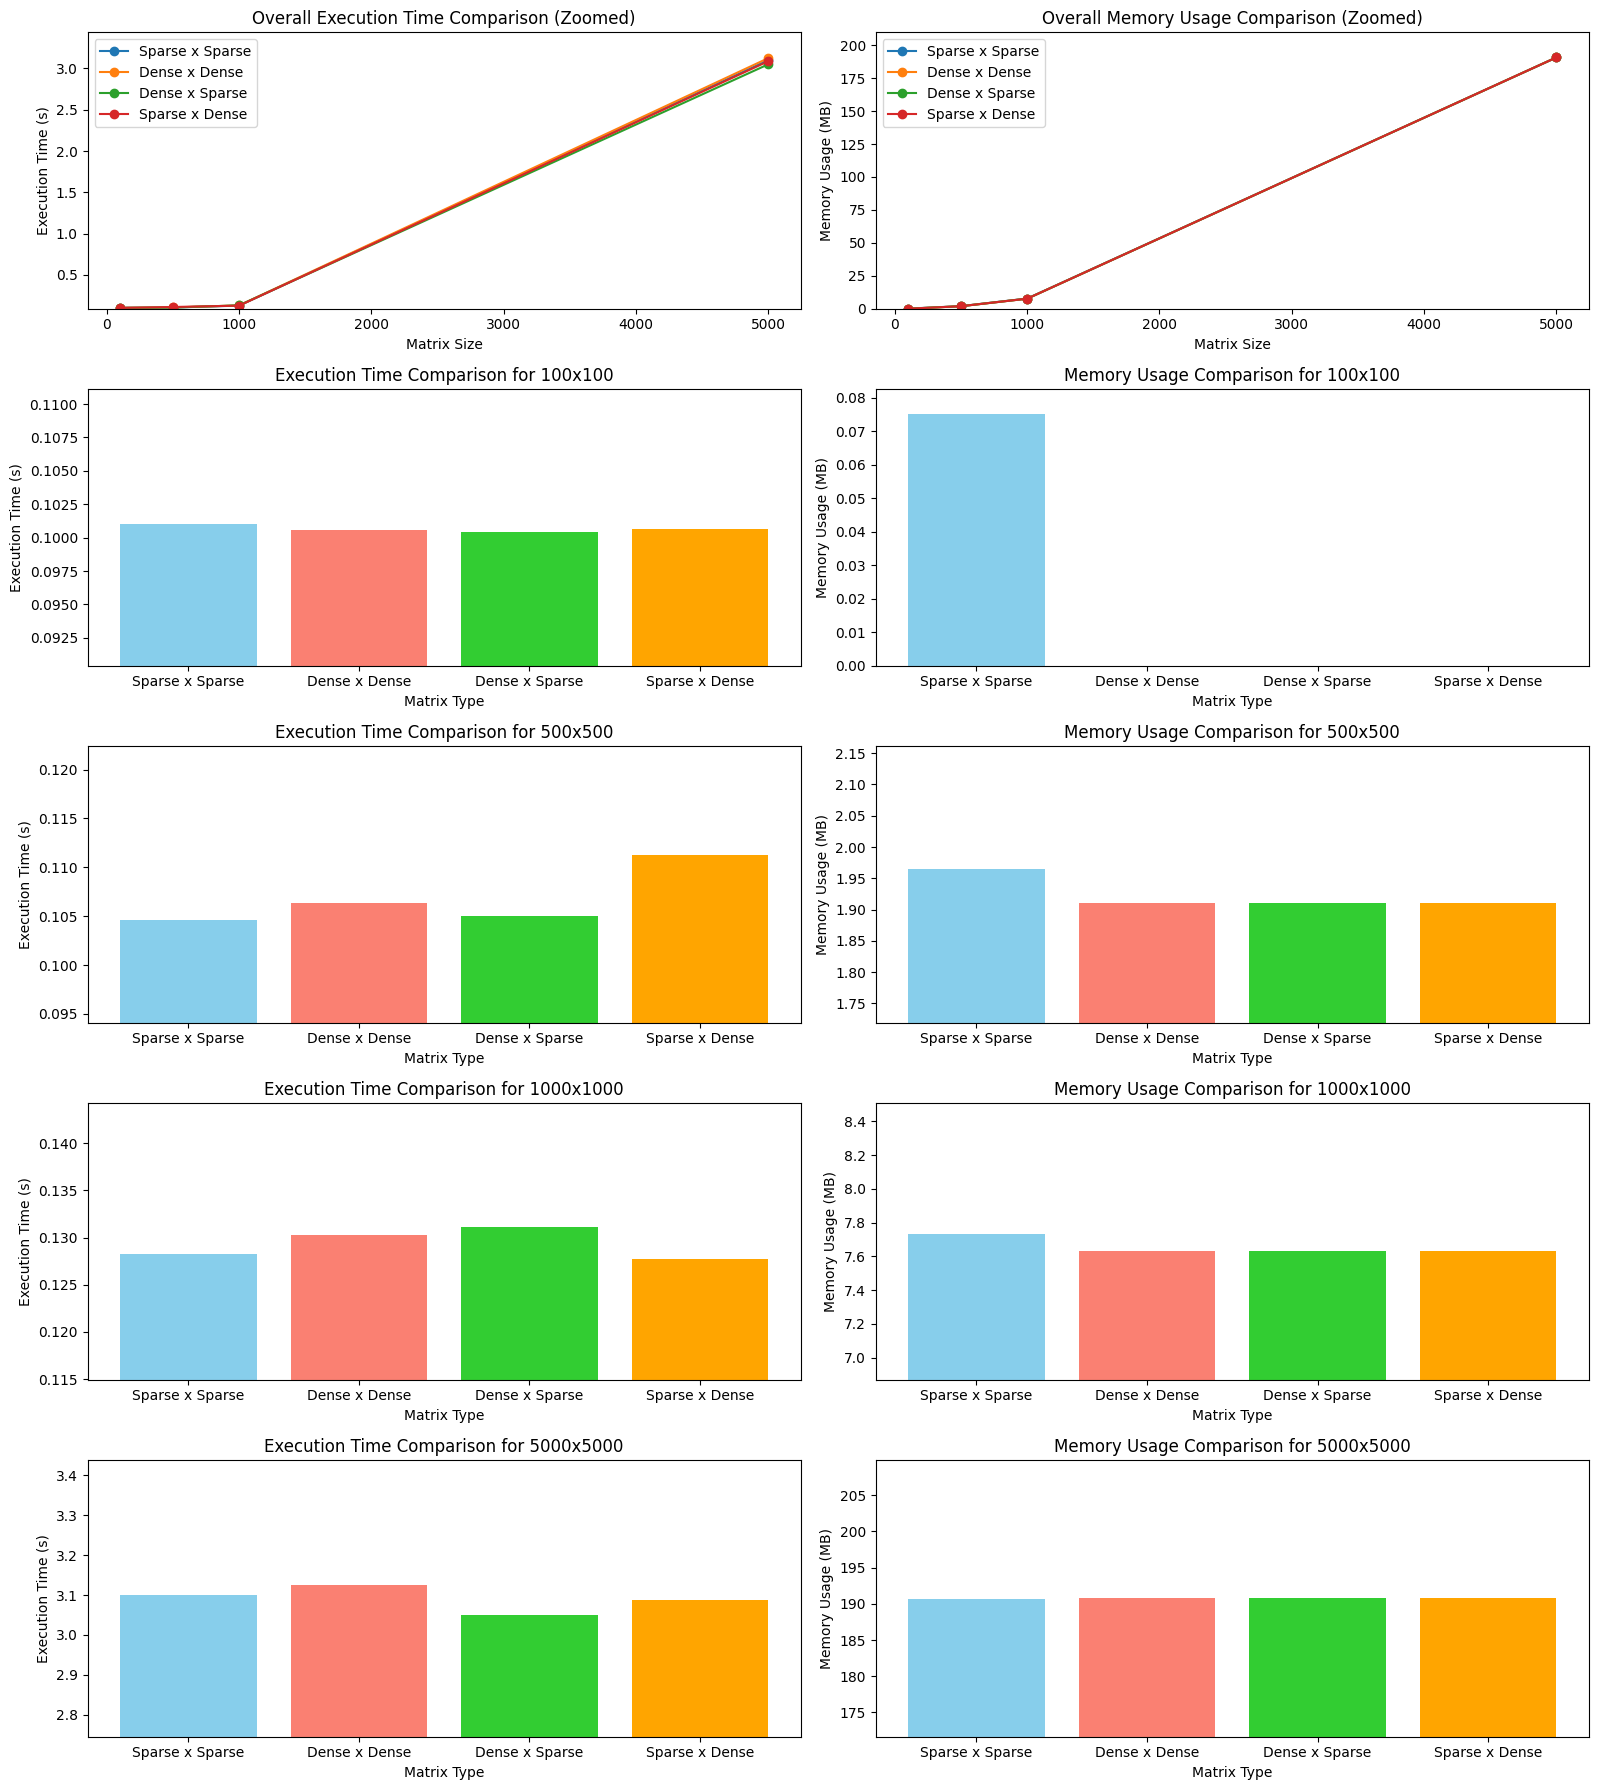

In [9]:
def printout(df, filename='matrix_benchmark_plots_zoomed.png'):
    # Set up a figure with multiple subplots
    fig, axes = plt.subplots(5, 2, figsize=(16, 18))  # 3 rows, 2 columns layout

    # 1. Overall comparison with line chart
    for matrix_type in df['Type'].unique():
        subset = df[df['Type'] == matrix_type]
        axes[0, 0].plot(subset['Size'], subset['Average Time (s)'], label=matrix_type, marker='o')
        axes[0, 1].plot(subset['Size'], subset['Average Memory (MB)'], label=matrix_type, marker='o')

    # Zoomed y-axis to highlight differences
    axes[0, 0].set_ylim(df['Average Time (s)'].min() * 0.9, df['Average Time (s)'].max() * 1.1)
    axes[0, 0].set_xlabel('Matrix Size')
    axes[0, 0].set_ylabel('Execution Time (s)')
    axes[0, 0].set_title('Overall Execution Time Comparison (Zoomed)')
    axes[0, 0].legend()

    axes[0, 1].set_ylim(df['Average Memory (MB)'].min() * 0.9, df['Average Memory (MB)'].max() * 1.1)
    axes[0, 1].set_xlabel('Matrix Size')
    axes[0, 1].set_ylabel('Memory Usage (MB)')
    axes[0, 1].set_title('Overall Memory Usage Comparison (Zoomed)')
    axes[0, 1].legend()

    # Function to plot bar charts for specific matrix sizes with zoomed y-axis
    def plot_bar_chart(matrix_size, ax_time, ax_memory):
        subset = df[df['Size'] == matrix_size]
        
        # Bar chart for execution time with a narrow y-axis range
        ax_time.bar(subset['Type'], subset['Average Time (s)'], color=['skyblue', 'salmon', 'limegreen', 'orange'])
        ax_time.set_ylim(subset['Average Time (s)'].min() * 0.9, subset['Average Time (s)'].max() * 1.1)  # zoom in on y-axis
        ax_time.set_xlabel('Matrix Type')
        ax_time.set_ylabel('Execution Time (s)')
        ax_time.set_title(f'Execution Time Comparison for {matrix_size}x{matrix_size}')
        
        # Bar chart for memory usage with a narrow y-axis range
        ax_memory.bar(subset['Type'], subset['Average Memory (MB)'], color=['skyblue', 'salmon', 'limegreen', 'orange'])
        ax_memory.set_ylim(subset['Average Memory (MB)'].min() * 0.9, subset['Average Memory (MB)'].max() * 1.1)  # zoom in on y-axis
        ax_memory.set_xlabel('Matrix Type')
        ax_memory.set_ylabel('Memory Usage (MB)')
        ax_memory.set_title(f'Memory Usage Comparison for {matrix_size}x{matrix_size}')
        
    plot_bar_chart(100, axes[1, 0], axes[1, 1])
    plot_bar_chart(500, axes[2, 0], axes[2, 1])
    plot_bar_chart(1000, axes[3, 0], axes[3, 1])
    plot_bar_chart(5000, axes[4, 0], axes[4, 1])

    plt.tight_layout()
    plt.show()


printout(df)

## STEP II: Choosing Reinforcement Learning (RL) Approach

In this setup, the goal is to use reinforcement learning (RL) to optimize matrix multiplication. The agent learns by interacting with an environment where it makes decisions about which multiplication strategies to apply based on the characteristics of the matrices.

#### 1. State Space

The state will consist of:
- Matrix size (e.g., 100x100, 1000x1000, 5000x5000)
- Matrix sparsity (dense or sparse)
- Partitioning options (whether to split the matrix, or apply different multiplication strategies)

#### 2. Action Space

The action space represents all the different actions or strategies the RL agent can choose from to perform matrix multiplication. In this case, actions are various matrix multiplication techniques and methods of partitioning, including:

- Divide the matrix into blocks
- Use different algorithms (Naive, Strassen’s, Block-based multiplication)
- Choose parallelization strategies


#### 3. Reward Function

The reward function gives the agent feedback on its chosen actions, guiding it toward better choices over time. The reward function should encourage:

- Faster execution time (positive reward for faster performance).
- Lower memory usage (positive reward for lower memory consumption).
- Negative rewards for poor performance (slower execution or higher memory usage).

# STEP III: PyTorch Implementation Setup